Advanced Data Science Capstone - Week 1 - Data Understanding¶
This will be the first of a series of notebooks about the Advanced Data Science Capstone project. I have chosen the dataset Twitter US Airline Sentiment, that can be found here: https://www.kaggle.com/crowdflower/twitter-airline-sentiment.

As quoted from the original source: "A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service")."

Therefore, as we can see, we have a sentiment analysis problem, that is, we will try to predict from a tweet its customer's sentiment, in other words, we will try to infer a customer's perspective for a specific service.

We have 14.500 tweets, and 15 columns and it contains whether the sentiment of the tweets in this set was positive, neutral, or negative for six US airlines[Source: Kaggle].

This notebook is classified as Data Understanding, our first step in a Data Science project (Actually, the first would be collecting data, however, as this was already done, we skip it here), that is, understanding our data and defining our goals. Thus, here we will work with visualizations about data, giving some basic statistics as well as trying to understand better our features, as they are not given directly by the data source.

So, let's have fun!

In [99]:
# Reading data
import pandas as pd
data = pd.read_csv (r"C:\Users\nisaurab\OneDrive - Capgemini\Downloads\DataScience\Capstone_Project_2\All Data\Tweets.csv")
# checking its dimensions
data.shape

(14640, 15)

In [2]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
# let's have a look in the number of features missing in our data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

As we can see, for features airline_sentiment_gold and negativereason_gold I have onyl a handful of values, let's what they represent


In [101]:
data[data.airline_sentiment_gold.notnull()].head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1286,569851578276048896,negative,1.0000,Late Flight,0.7684,United,negative,MrEschatologist,Late Flight\nFlight Attendant Complaints,0,"@united I'm aware of the flight details, thank...",NaN,2015-02-23 05:29:38 -0800,"Arlington, VA",NaN
2017,569473998519578624,negative,1.0000,Late Flight,0.6048,United,negative,traceyabbywhite,Late Flight\nLost Luggage,0,@united flighted delayed for hours. 10pm arriv...,NaN,2015-02-22 04:29:16 -0800,"Atlantic Highlands, NJ",Eastern Time (US & Canada)
2135,569343661063823360,neutral,1.0000,NaN,NaN,United,neutral,aushianya,NaN,0,@united I have a question,NaN,2015-02-21 19:51:21 -0800,NaN,NaN
2201,569318505755103232,negative,1.0000,Late Flight,0.6478,United,negative,tarlonious,Late Flight,1,@united it's been over 3 hours...at what point...,NaN,2015-02-21 18:11:23 -0800,NaN,NaN
2383,569235954789015552,negative,0.9286,Customer Service Issue,0.9286,United,negative,screamingbrat,Customer Service Issue,0,@united You shouldn't page o'head that it's be...,NaN,2015-02-21 12:43:22 -0800,"new york, baby",Eastern Time (US & Canada)


In [5]:
data[data.negativereason_gold.notnull()].head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1286,569851578276048896,negative,1.0000,Late Flight,0.7684,United,negative,MrEschatologist,Late Flight\nFlight Attendant Complaints,0,"@united I'm aware of the flight details, thank...",NaN,2015-02-23 05:29:38 -0800,"Arlington, VA",NaN
2017,569473998519578624,negative,1.0000,Late Flight,0.6048,United,negative,traceyabbywhite,Late Flight\nLost Luggage,0,@united flighted delayed for hours. 10pm arriv...,NaN,2015-02-22 04:29:16 -0800,"Atlantic Highlands, NJ",Eastern Time (US & Canada)
2201,569318505755103232,negative,1.0000,Late Flight,0.6478,United,negative,tarlonious,Late Flight,1,@united it's been over 3 hours...at what point...,NaN,2015-02-21 18:11:23 -0800,NaN,NaN
2383,569235954789015552,negative,0.9286,Customer Service Issue,0.9286,United,negative,screamingbrat,Customer Service Issue,0,@united You shouldn't page o'head that it's be...,NaN,2015-02-21 12:43:22 -0800,"new york, baby",Eastern Time (US & Canada)
3005,568802013196242944,negative,1.0000,Can't Tell,0.6870,United,negative,katieclaytonn,Can't Tell,0,@united couldn't have possibly messed up our t...,NaN,2015-02-20 07:59:02 -0800,NaN,Central Time (US & Canada)


By inspection, we see that these values are the same for other columns as airline_sentiment and negativereason, 
then we will drop them without information loss. Also, tweet_coord represents the coordinate of the tweet, 
as we have a lot of null values and with the features tweet_location, we will drop it as well.

Also I find 194 enteries where I have the tweet cord but tweet location is null. If I didnt had a lot of data to work on I could have used this info to populate the location field before dropping tweet_coord column



In [6]:

data[data.tweet_coord.notnull() & data.tweet_location.isnull()].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 21 to 14624
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      194 non-null    int64  
 1   airline_sentiment             194 non-null    object 
 2   airline_sentiment_confidence  194 non-null    float64
 3   negativereason                136 non-null    object 
 4   negativereason_confidence     148 non-null    float64
 5   airline                       194 non-null    object 
 6   airline_sentiment_gold        1 non-null      object 
 7   name                          194 non-null    object 
 8   negativereason_gold           1 non-null      object 
 9   retweet_count                 194 non-null    int64  
 10  text                          194 non-null    object 
 11  tweet_coord                   194 non-null    object 
 12  tweet_created                 194 non-null    object 
 13  tw

In [8]:
data = data.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], axis = 1)
data.shape

(14640, 12)

Now, we also have null values for the following features: negativereason, negativereason_confidence, tweet_location, user_timezone. Let's dig deeper into it.

In [9]:
data[data.negativereason.isnull()].head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,pilot,0,@VirginAmerica Really missed a prime opportuni...,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)


It seems negativereason is null whenever we have airline sentiment as neutral or positive. Lets confirm that with below 

In [31]:
data[data.negativereason.isnull()].airline_sentiment.count() 

5462

In [32]:
data[data.negativereason.isnull() & data.airline_sentiment.isin(['neutral','positive'])].airline_sentiment.count()

5462

Similarly negativereason_confidence column, then it will be just the 0 for all these cases.

One important point that I note here is features like negativereason, I may be using it for some vizualization purposes, but this may not be a feature for my sentiment analysis model creation. The reason why think so is because my model would be made to analyze real time tweets, and the same wont have this feature in real enviroment. What we will have is the tweet text and its features like locationa and timezone.

In [ ]:
Now lets do some vizualizations:

Text(0.5, 1.0, 'Sentiment Distribution per Airline Company')

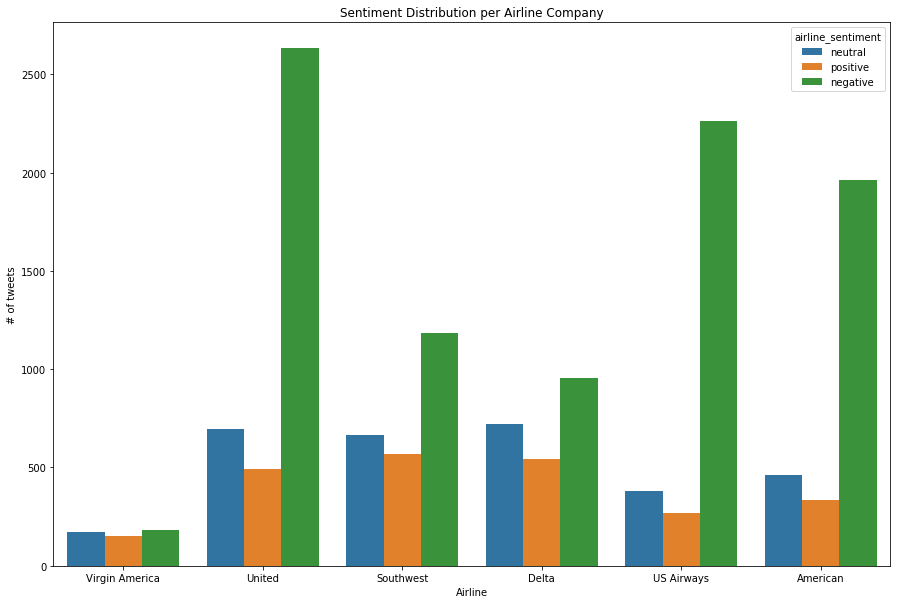

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 10))

ax = sns.countplot(x="airline", hue="airline_sentiment", data=data)
ax.set_xlabel('Airline')
ax.set_ylabel('# of tweets')
ax.set_title('Sentiment Distribution per Airline Company')

#### Exploratory data analysis 1: 

Frome above We clearly can see "United" seems to have worst negative feedbacks and "Virgin America" is best at same. 

In other words seems proportion of Positive/Negative/Neutral feedbacks varies with Airlines company. But is that true.Lets do a statistical test to find the same.

#### Below would be my NULL Hypothesis which I would try to prove wrong:

###### NULL Hypothesis: 
Proportion of Positive/Negative/Neutral feedbacks varies with Airlines company

In [105]:
from scipy import stats
from statsmodels.stats import weightstats as stests
table = pd.crosstab(data.airline,data['airline_sentiment'])
#Observed Values
Observed_Values = table.values
print("Observed Values :-\n",table)

Observed Values :-
 airline_sentiment  negative  neutral  positive
airline                                       
American               1960      463       336
Delta                   955      723       544
Southwest              1186      664       570
US Airways             2263      381       269
United                 2633      697       492
Virgin America          181      171       152


In [108]:
# Since we are comparing 2 categorical values. I will go for CHI SQUARED Test

chi_square_statistic, p, ddof, Expected_Values =stats.chi2_contingency(table)
#Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
print("Degree of Freedom:-",ddof)

Expected Values :-
 [[1729.65177596  584.02602459  445.32219945]
 [1392.99972678  470.35368852  358.6465847 ]
 [1517.1284153   512.26639344  390.60519126]
 [1826.19631148  616.62479508  470.17889344]
 [2396.05983607  809.04221311  616.89795082]
 [ 315.96393443  106.68688525   81.34918033]]
Degree of Freedom:- 10


In [110]:
alpha = 0.05
critical_value=stats.chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
print('p-value:',p)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('critical_value:',critical_value)

critical_value: 18.307038053275146
p-value: 1.1843123973768729e-241
Significance level:  0.05
Degree of Freedom:  10
critical_value: 18.307038053275146


In [112]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between Airlines Company and prportion of feedbacks")
else:
    print("Retain H0,There is no relationship between Airlines Company and prportion of feedbacks")
    
if p<=alpha:
     print("Reject H0,There is a relationship between Airlines Company and prportion of feedbacks")
else:
    print("Retain H0,There is no relationship between Airlines Company and prportion of feedbacks")

Reject H0,There is a relationship between Airlines Company and prportion of feedbacks
Reject H0,There is a relationship between Airlines Company and prportion of feedbacks


In [38]:
data.airline_sentiment.value_counts(normalize=True)

negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

Text(0, 0.5, '# of tweets')

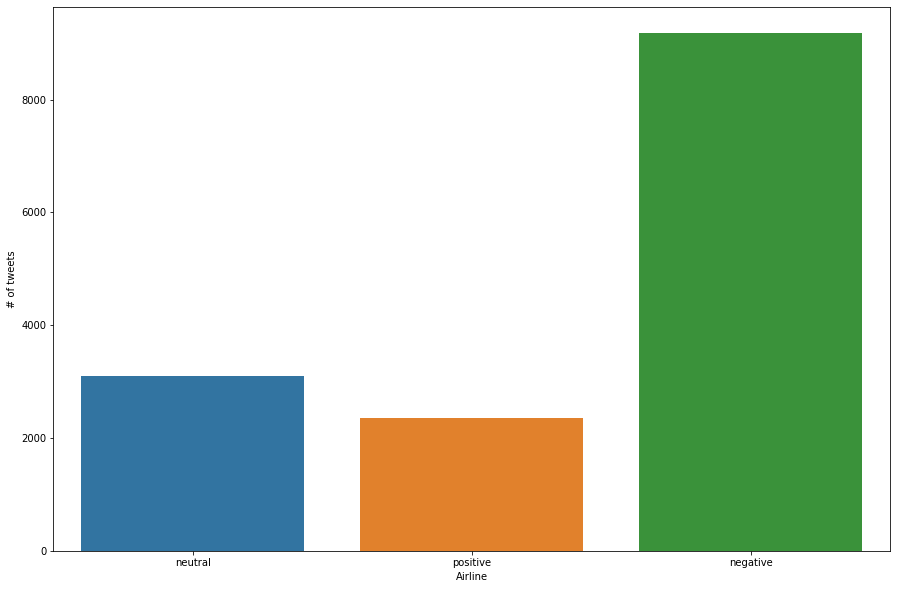

In [39]:
f, ax = plt.subplots(figsize=(15, 10))

ax = sns.countplot(x="airline_sentiment", data=data)
ax.set_xlabel('Airline')
ax.set_ylabel('# of tweets')

#### Exploratory data analysis 2: 
Also overall US flights are not so good with customer service considering 60 % of tweets were negative. We can also account one important fact around human behavior of people using social media more often to vent out there anger for a bad service compared to negative or postive service. Lets see if we validate this finding with a Hypothesis testing.

Now lets analyze the data from time zone prospective

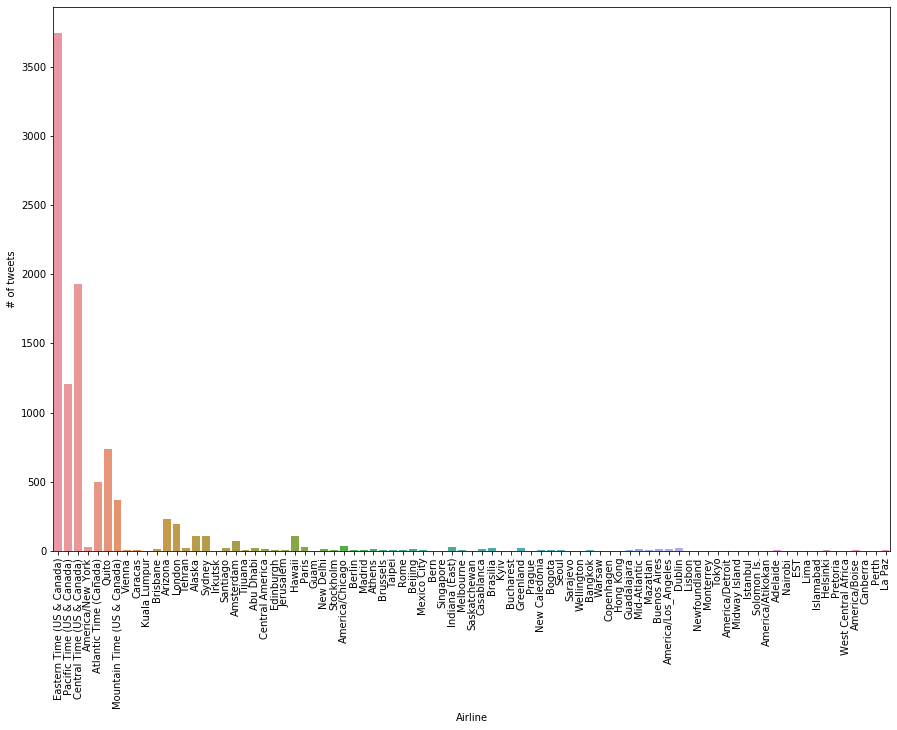

In [49]:
f, ax = plt.subplots(figsize=(15, 10))

ax = sns.countplot(x="user_timezone", data=data)
ax.set_xlabel('Airline')
ax.set_ylabel('# of tweets')
label=ax.get_xticklabels()
ax.set_xticklabels(label,rotation=90);

Lets now visualize how tweets sentiments are devided based on top 3 time zones 

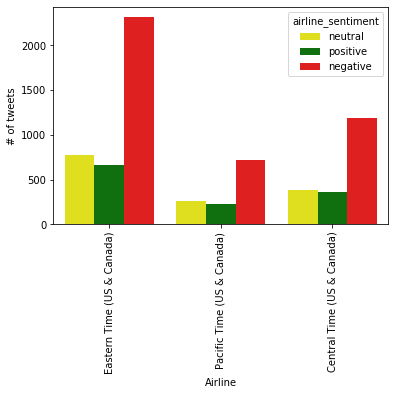

In [103]:
tz=data.user_timezone.value_counts().index[0:3]
palette_colors = {"neutral": "yellow", "positive": "green", "negative": "red"}
ax = sns.countplot(x="user_timezone", hue='airline_sentiment',data=data[data.user_timezone.isin(tz)],palette=palette_colors)
ax.set_xlabel('Airline')
ax.set_ylabel('# of tweets')
label=ax.get_xticklabels()
ax.set_xticklabels(label,rotation=90);

Lets now visualize how tweets sentiments are devided based on top 7 time zones 

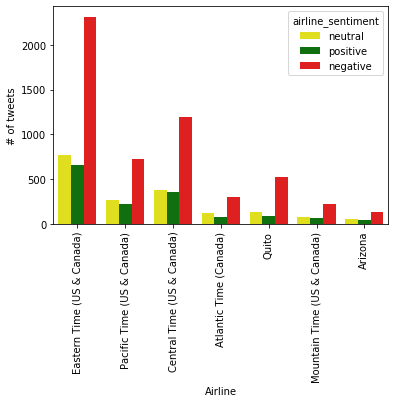

In [104]:
tz=data.user_timezone.value_counts().index[0:7]
palette_colors = {"neutral": "yellow", "positive": "green", "negative": "red"}
ax = sns.countplot(x="user_timezone", hue='airline_sentiment',data=data[data.user_timezone.isin(tz)],palette=palette_colors)
ax.set_xlabel('Airline')
ax.set_ylabel('# of tweets')
label=ax.get_xticklabels()
ax.set_xticklabels(label,rotation=90);

### Exploratory data analysis 3: 

We can clearly notice the timezones do not impact a lot on sentiment distribution. Something which I was not expecting. This would be basis for my next Hypothesis testing.

Also to get a better understanding I will stick with US time Zones first and the overall also.

#### Hypothesis 2

Proportion of my different feedbacks do not change with US time Zones


In [187]:
Time_zone = data.user_timezone.value_counts().index[0:6].values
data_tz = data[data.user_timezone.isin(Time_zone)][data.user_timezone.str.contains('Quito')==0]


C:\Users\nisaurab\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [188]:

table = pd.crosstab(data_tz.user_timezone,data_tz['airline_sentiment'])
#Observed Values
Observed_Values = table.values
print("Observed Values :-\n",table)

Observed Values :-
 airline_sentiment            negative  neutral  positive
user_timezone                                           
Atlantic Time (Canada)            299      120        78
Central Time (US & Canada)       1191      383       357
Eastern Time (US & Canada)       2313      769       662
Mountain Time (US & Canada)       226       76        67
Pacific Time (US & Canada)        720      264       224


In [189]:
# Since we are comparing 2 categorical values. I will go for CHI SQUARED Test

chi_square_statistic, p, ddof, Expected_Values =stats.chi2_contingency(table)
#Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
print("Degree of Freedom:-",ddof)

Expected Values :-
 [[ 304.58807588  103.38934056   89.02258356]
 [1183.41966705  401.69983224  345.88050071]
 [2294.52264808  778.8524971   670.62485482]
 [ 226.14285714   76.76190476   66.0952381 ]
 [ 740.32675184  251.29642535  216.37682282]]
Degree of Freedom:- 8


In [190]:
alpha = 0.05
critical_value=stats.chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
print('p-value:',p)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('critical_value:',critical_value)

critical_value: 15.50731305586545
p-value: 0.5061345669137645
Significance level:  0.05
Degree of Freedom:  8
critical_value: 15.50731305586545


In [193]:
if chi_square_statistic>=critical_value:
    print("Reject H2,There is a relationship between US TimeZone and prportion of feedbacks")
else:
    print("Retain H2,There is no relationship between US TimeZone and prportion of feedbacks")
    
if p<=alpha:
     print("Reject H2,There is a relationship between US TimeZone and prportion of feedbacks")
else:
    print("Retain H2,There is no relationship between US TimeZone and prportion of feedbacks")

Retain H2,There is no relationship between US TimeZone and prportion of feedbacks
Retain H2,There is no relationship between US TimeZone and prportion of feedbacks


#### Hypothesis 3

Proportion of my different feedbacks do not change with Any time Zones

In [194]:

table = pd.crosstab(data.user_timezone,data['airline_sentiment'])
#Observed Values
Observed_Values = table.values
print("Observed Values :-\n",table)

Observed Values :-
 airline_sentiment    negative  neutral  positive
user_timezone                                   
Abu Dhabi                   0       13        10
Adelaide                    2        3         2
Alaska                     73       18        17
America/Atikokan            1        0         0
America/Boise               3        0         0
...                       ...      ...       ...
Tokyo                       0        1         0
Vienna                      1        1         1
Warsaw                      0        1         0
Wellington                  0        1         0
West Central Africa         1        0         0

[85 rows x 3 columns]


In [195]:
# Since we are comparing 2 categorical values. I will go for CHI SQUARED Test

chi_square_statistic, p, ddof, Expected_Values =stats.chi2_contingency(table)
#Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
print("Degree of Freedom:-",ddof)

Expected Values :-
 [[1.40716904e+01 4.98411405e+00 3.94419552e+00]
 [4.28268839e+00 1.51690428e+00 1.20040733e+00]
 [6.60757637e+01 2.34036660e+01 1.85205703e+01]
 [6.11812627e-01 2.16700611e-01 1.71486762e-01]
 [1.83543788e+00 6.50101833e-01 5.14460285e-01]
 [2.26370672e+01 8.01792261e+00 6.34501018e+00]
 [6.11812627e-01 2.16700611e-01 1.71486762e-01]
 [9.17718941e+00 3.25050916e+00 2.57230143e+00]
 [1.59071283e+01 5.63421589e+00 4.45865580e+00]
 [4.52741344e+01 1.60358452e+01 1.26900204e+01]
 [1.40105092e+02 4.96244399e+01 3.92704684e+01]
 [9.78900204e+00 3.46720978e+00 2.74378819e+00]
 [3.04070876e+02 1.07700204e+02 8.52289206e+01]
 [2.44725051e+00 8.66802444e-01 6.85947047e-01]
 [6.72993890e+00 2.38370672e+00 1.88635438e+00]
 [5.50631365e+00 1.95030550e+00 1.54338086e+00]
 [6.11812627e-01 2.16700611e-01 1.71486762e-01]
 [3.05906314e+00 1.08350305e+00 8.57433809e-01]
 [1.40716904e+01 4.98411405e+00 3.94419552e+00]
 [6.11812627e+00 2.16700611e+00 1.71486762e+00]
 [5.50631365e+00 1.9

In [197]:
alpha = 0.05
critical_value=stats.chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
print('p-value:',p)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('critical_value:',critical_value)


critical_value: 199.2441769293174
p-value: 1.1348958792602684e-33
Significance level:  0.05
Degree of Freedom:  168
critical_value: 199.2441769293174


In [199]:
if chi_square_statistic>=critical_value:
    print("Reject H3,There is a relationship between TimeZone and prportion of feedbacks")
else:
    print("Retain H3,There is no relationship between TimeZone and prportion of feedbacks")
    
if p<=alpha:
     print("Reject H3,There is a relationship between TimeZone and prportion of feedbacks")
else:
    print("Retain H3,There is no relationship between TimeZone and prportion of feedbacks")

Reject H3,There is a relationship between TimeZone and prportion of feedbacks
Reject H3,There is a relationship between TimeZone and prportion of feedbacks


### Interesting findings 

Seems When we compare just the Tweets in US time zone we do not find any depedency between tweet proportions but when we consider all thet time zones there is a relationship between TimeZone and prportion of feedbacks

###  Now lets do some Bag of words exercise to find out how the same looks for both positive and negative sentiment tweets

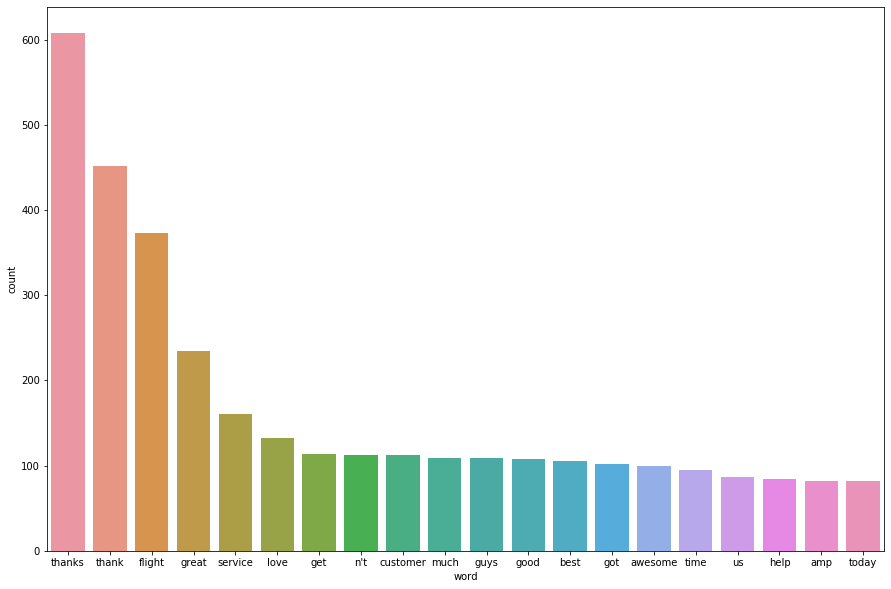

In [221]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
import nltk
from collections import Counter

## Positive Tweets
pos_tweets = data[data.airline_sentiment=='positive']['text'].values
## Negative tweets
neg_tweets = data[data.airline_sentiment=='negative']['text'].values
#define filter words
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['jetblue', 'southwestair','united','americanair','usairways','http','virginamerica','\'s','...']
#seperate out the words from the tweets
pos_tweets_tok = [w.lower() for tweet in pos_tweets for w in word_tokenize(tweet) if w.lower() not in stop ]
neg_tweets_tok = [w for tweet in neg_tweets for w in word_tokenize(tweet) if w.lower() not in stop]
#Lets see the Positive Tweets first
count_terms = Counter(pos_tweets_tok)
pos_tweets_cnt = pd.DataFrame (count_terms.most_common(20), columns = ['word','count'])
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(pos_tweets_cnt['word'],pos_tweets_cnt['count'] )

##### As expected, in positive reviews we have the word thank appearing more times than the others ones. Let's do the same for negative reviews.

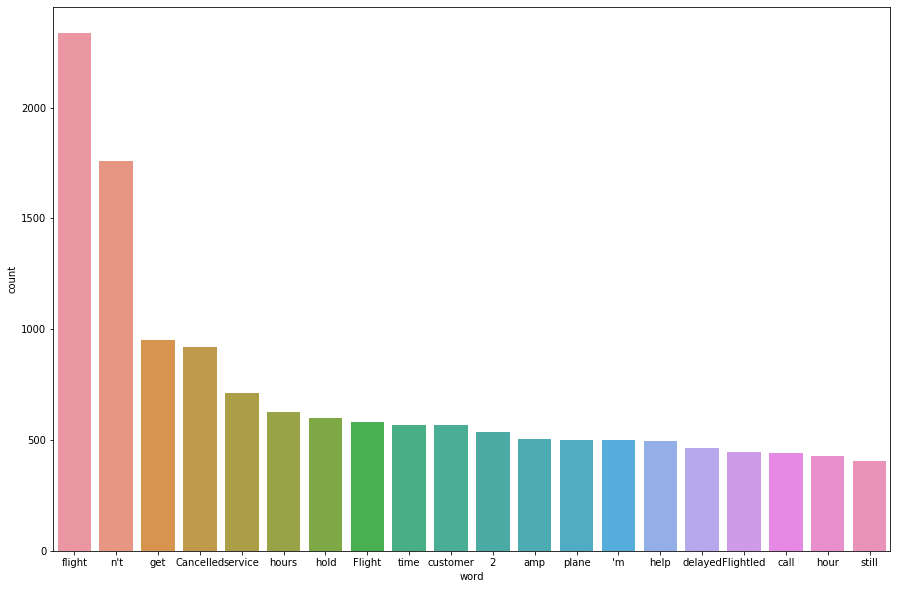

In [222]:
count_terms = Counter(neg_tweets_tok)
ng_tweets_cnt = pd.DataFrame (count_terms.most_common(20), columns = ['word','count'])
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(ng_tweets_cnt['word'],ng_tweets_cnt['count'] )


##### Here, we have flights as the first most common word. The reason could be that negative tweets are complainings about something that happened during a flight time, indicating that a operational problem. Also we notice words like "Canceled", " Servive", "Hours"."Hold" and "Time" which points to either a bad service or flights getting delayed/cancelled or combination of both.



### With Above bag of words analysis I will be ending my exporatory data analysis and move on to feature engineering section now